In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

In [2]:
PDBS_PATH = "../../datasets/covering_pdbs"

# command used to execute TMALIGN
# if your installation is on default PATH
# this can simply be ./TMalign
# The following command refers to the compiled 
# version that can be found in this repo
TMALIGN = "./TMalign/TMalign"

# score to be used tmscore/rmsd
SCORE = 'tmscore' 

In [3]:
# read list of PDBs that will be used
with open(PDBS_PATH+"/list_pdbs.txt", 'r') as f:
    pdbs = f.read().split('\n')[:-1]
    print("Read {} pdbs".format(len(pdbs)))

Read 42 pdbs


In [25]:
from structuralAlignment import TMalign

alignments_score = np.zeros((len(pdbs), len(pdbs)))
# performe pairwise alignment (upper triangular matrix)
for i, pdb1 in enumerate(pdbs):
    if i%10==0:
        print("row {} / {}".format(i+1, len(pdbs)))
    for j, pdb2 in enumerate(pdbs):
        if j<i:
            continue
        alignments_score[i][j] = TMalign(pdb1, pdb2, score=SCORE)

row 1 / 42
row 11 / 42
row 21 / 42
row 31 / 42
row 41 / 42


In [26]:
if SCORE == "tmscore":
    # set 0 as minimum distance instead of 1
    iu = np.triu_indices(alignments_score.shape[0])
    alignments_score_distance = alignments_score.copy()
    alignments_score_distance[iu] = np.abs(alignments_score[iu] - 1)

In [29]:
alignments_score_distance

array([[0.     , 0.38414, 0.19389, ..., 0.19887, 0.2149 , 0.1803 ],
       [0.     , 0.     , 0.43776, ..., 0.4298 , 0.45514, 0.41045],
       [0.     , 0.     , 0.     , ..., 0.22036, 0.31222, 0.15738],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.29341, 0.29056],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.3313 ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ]])

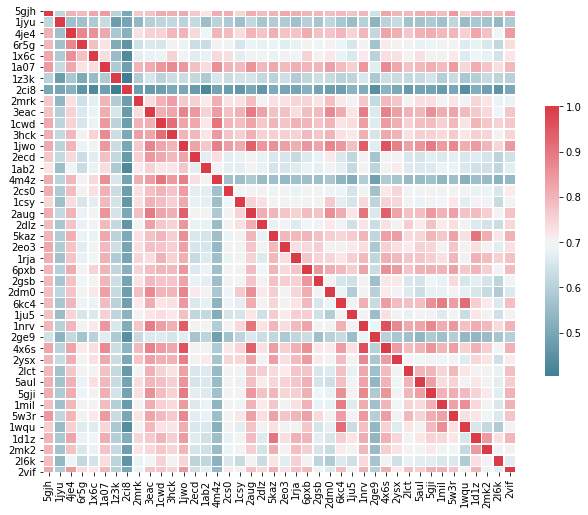

In [30]:
import seaborn as sns

square_matrix = alignments_score.T + alignments_score
np.fill_diagonal(square_matrix,np.diag(alignments_score))

labelList = [pdb.split('.')[0] for pdb in pdbs]

fig = plt.figure(figsize=(9,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(square_matrix, yticklabels=labelList, xticklabels=labelList,
            cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()
plt.savefig("../../figures/structuralAlignmentDistance.pdf")
plt.show()

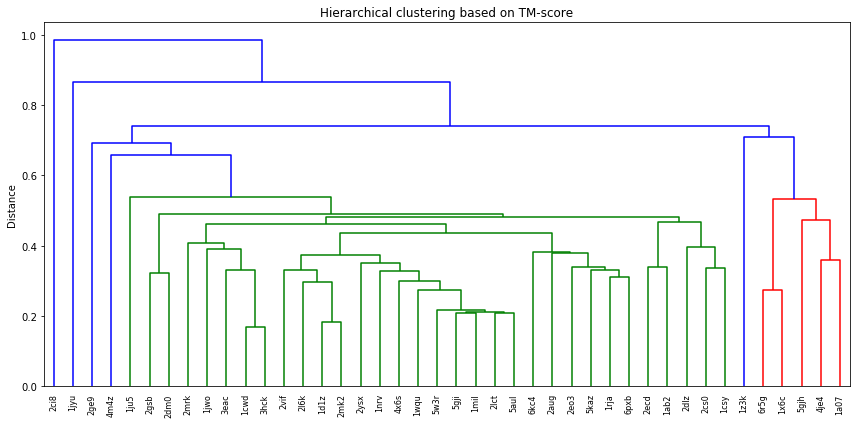

In [31]:
labelList = [pdb.split('.')[0] for pdb in pdbs]

fig = plt.figure(figsize=(12,6))

dendrogram(
    linkage(alignments_score_distance, method='single'),
    labels=labelList, leaf_rotation = 90, color_threshold=0.6
)
plt.title("Hierarchical clustering based on TM-score")
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig("../../figures/dendogram_tmscore_single.pdf")
plt.show()

In [33]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(linkage(alignments_score_distance, method='single'), t = 0.6, criterion='distance')
clusters

array([4, 6, 4, 4, 4, 4, 5, 7, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [34]:
# red cluster has id = 4
# green clsuter has id = 1

idx = np.arange(0,len(pdbs))
cluster_green = idx[clusters==1]
cluster_red = idx[clusters==4]

In [35]:
def clusterStatistics(cluster):
    dist_cluster = alignments_score[np.ix_(cluster, cluster)]
    scores_cluster = dist_cluster[np.logical_and(dist_cluster>0, dist_cluster<1)]
    print("Number of elements {}".format(cluster.shape[0]))
    print("Mean score: {}".format(np.mean(scores_cluster)))
    print("Standard deviation: {}".format(np.std(scores_cluster)))

In [36]:
clusterStatistics(cluster_red)

Number of elements 5
Mean score: 0.80578
Standard deviation: 0.046103063455696744


In [37]:
clusterStatistics(cluster_green)

Number of elements 32
Mean score: 0.746254133064516
Standard deviation: 0.06802545990744487
